# Classification with a neural network

In [1]:
%matplotlib inline
import tensorflow as tf

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, model_selection

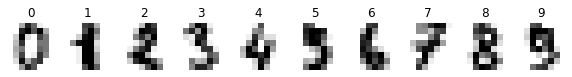

In [2]:
digits = datasets.load_digits()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('%i' % label)

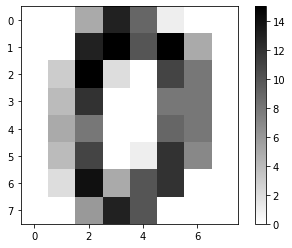

In [3]:
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
target = digits.target
data = digits.images

print("min value: {}".format(np.amin(data)))
print("max value: {}".format(np.amax(data)))
print("shape: {}".format(np.shape(data)))

min value: 0.0
max value: 16.0
shape: (1797, 8, 8)


train samples: 898
test samples 899


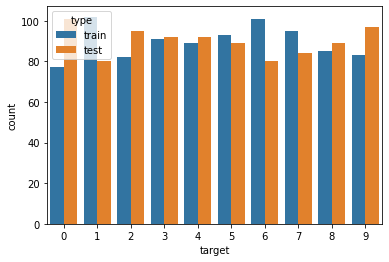

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.5)


X_train = X_train.astype('float32') / 16.
X_test = X_test.astype('float32') / 16.

df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.countplot(x='target', hue='type', data=df_set)     

print('train samples:', len(X_train))
print('test samples', len(X_test))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(8, 8)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])




model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
%%time
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, verbose=0)

CPU times: user 7.08 s, sys: 878 ms, total: 7.96 s
Wall time: 6.37 s


In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.010097,1.0,0.109088,0.972222,95
96,0.009702,1.0,0.107838,0.972222,96
97,0.009366,1.0,0.109395,0.972222,97
98,0.009098,1.0,0.105550,0.972222,98
99,0.008992,1.0,0.107548,0.972222,99


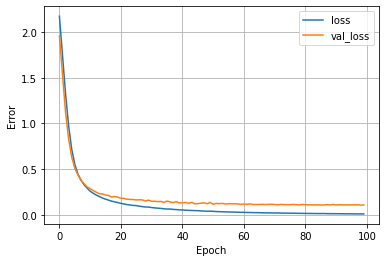

In [9]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [10]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.10432936996221542
Test accuracy: 0.9688543081283569


In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [12]:
predicted = [np.argmax(x) for x in probability_model.predict(X_test)]

confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, predicted))
confusion_matrix

,0,1,2,3,4,5,6,7,8,9
0,98,0,1,0,1,0,1,0,0,0
1,0,79,0,0,0,0,0,0,0,1
2,0,0,95,0,0,0,0,0,0,0
3,0,0,0,90,0,2,0,0,0,0
4,0,0,0,0,90,0,0,1,1,0
5,0,0,0,1,0,87,0,1,0,0
6,0,4,0,0,0,0,75,0,1,0
7,0,0,0,0,0,0,0,84,0,0
8,0,2,0,1,0,2,0,0,84,0
9,0,0,0,4,0,3,0,1,0,89


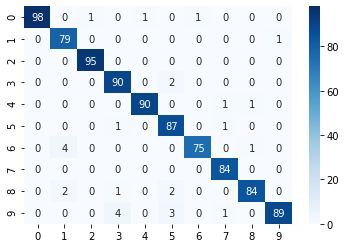

In [13]:
_ = sns.heatmap(confusion_matrix, annot=True, cmap="Blues")

In [14]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, predicted)))
print("precision: {:.3f}".format(metrics.precision_score(y_test, predicted, average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(y_test, predicted, average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(y_test, predicted, average='weighted')))

accuracy: 0.969
precision: 0.970
recall: 0.969
f1 score: 0.969
